In [560]:
# ========================
# 1. CARGA Y PREPROCESAMIENTO
# ========================

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt  

In [561]:
path_base="Data\\Extraidos\\"
path_base+"duracion_asignatura.csv"

'Data\\Extraidos\\duracion_asignatura.csv'

In [562]:
# 1.1 Cargar archivos CSV (usa el separador ; y utf-8 encoding)
df_duracion = pd.read_csv(path_base+"duracion_asignatura.csv", sep=";", encoding="utf-8")
df_plan = pd.read_csv(path_base+"plan_estudios.csv", sep=";", encoding="utf-8")
df_sum_horario = pd.read_csv(path_base+"sum_horario_programado2025I.csv", sep=";", encoding="utf-8")
df_docentes_minimos = pd.read_csv(path_base+"docentes_minimos.csv", sep=";", encoding="utf-8")
df_disponibilidad = pd.read_csv(path_base+"disponibilidad_docentes_simulada.csv", encoding="utf-8")


In [563]:
# 1.2 Revisar columnas clave y renombrar si es necesario
df_duracion.rename(columns=lambda x: x.strip(), inplace=True)
df_plan.rename(columns=lambda x: x.strip(), inplace=True)
df_sum_horario.rename(columns=lambda x: x.strip(), inplace=True)
df_docentes_minimos.rename(columns=lambda x: x.strip(), inplace=True)
df_disponibilidad.rename(columns=lambda x: x.strip(), inplace=True)

In [564]:
# 1.3 Asegurar tipos de datos
for df in [df_duracion, df_plan, df_sum_horario, df_docentes_minimos, df_disponibilidad]:
    df.columns = df.columns.str.strip()

df_disponibilidad['HoraInicio'] = pd.to_datetime(df_disponibilidad['HoraInicio'], format="%H:%M").dt.time
df_disponibilidad['HoraFin'] = pd.to_datetime(df_disponibilidad['HoraFin'], format="%H:%M").dt.time
#df_disponibilidad.rename(columns=lambda x: x.replace("í", "i").replace("Í", "I").replace("á", "a"), inplace=True)

In [565]:
# 1.4 Unificar claves: CodAsignatura, CodDocente
for df in [df_duracion, df_plan, df_docentes_minimos]:
    if 'CodAsignatura' in df.columns:
        df['CodAsignatura'] = df['CodAsignatura'].astype(str).str.strip()

if 'CodDocente' in df_sum_horario.columns:
    df_sum_horario['CodDocente'] = df_sum_horario['CodDocente'].astype(str).str.strip()

if 'CodAsignatura' in df_disponibilidad.columns:
    df_disponibilidad['CodAsignatura'] = df_disponibilidad['CodAsignatura'].astype(str).str.strip()

In [566]:
# 1.5 Vista previa de los datasets
print("Duración de asignaturas:", df_duracion.shape)
print("Plan de estudios:", df_plan.shape)
print("Resumen horario programado:", df_sum_horario.shape)
print("Docentes mínimos:", df_docentes_minimos.shape)
print("Disponibilidad docente simulada:", df_disponibilidad.shape)

Duración de asignaturas: (65, 4)
Plan de estudios: (104, 6)
Resumen horario programado: (224, 12)
Docentes mínimos: (65, 6)
Disponibilidad docente simulada: (73, 7)


In [567]:
df_duracion.head()

,NomAsignatura,DuracionHoras,Ciclo,CodAsignatura
0,ALGORÍTMICA I,5.0,3,202W0301
1,ALGORÍTMICA I,3.0,3,202W0301
2,ESTADÍSTICA,5.0,3,202W0302
3,FISICA ELÉCTRONICA,4.0,3,202W0303
4,INGENIERÍA ECONÓMICA,4.0,3,202W0304


In [568]:
df_plan.head()

,Ciclo,Créditos,CodAsignatura,NomAsignatura,Cod Pre-Requisito,Nom Pre-Requisito
0,1,2.0,INE001,PROCESO CULTURAL ANDINO,NaN,NaN
1,1,2.0,INE002,PROGRAMACIÓN Y COMPUTACIÓN,NaN,NaN
2,1,2.0,INE003,DIBUJO TÉCNICO,NaN,NaN
3,1,2.0,INE004,INGLÉS PARA ESCRITURA ACADÉMICA,NaN,NaN
4,1,2.0,INE005,MATLAB,NaN,NaN


In [569]:
df_sum_horario.head()

,CodAsignatura,NomAsignatura,Créditos,CodDocente,NomDocente,Sección,Aula,Día,HoraInicio,HoraFin,Tope,Matriculados
0,INE002,PROGRAMACIÓN Y COMPUTACIÓN,2.0,0A0182,"RUIZ RIVERA, MARIA ELENA",2,211,VIERNES,14:00,15:00,4,2
1,INE002,PROGRAMACIÓN Y COMPUTACIÓN,2.0,0A0182,"RUIZ RIVERA, MARIA ELENA",2,211,VIERNES,15:00,17:00,4,2
2,INE002,PROGRAMACIÓN Y COMPUTACIÓN,2.0,07240690,"DAMASO RIOS, MARIA ROSA",3,211,MARTES,10:00,11:00,4,3
3,INE002,PROGRAMACIÓN Y COMPUTACIÓN,2.0,07240690,"DAMASO RIOS, MARIA ROSA",3,211,MARTES,11:00,13:00,4,3
4,INE002,PROGRAMACIÓN Y COMPUTACIÓN,2.0,085774,"VERA POMALAZA, VIRGINIA",5,211,MIERCOLES,10:00,11:00,4,1


In [570]:
df_docentes_minimos.head()

,CodAsignatura,NomAsignatura,Matriculados,DuracionHoras,NumGrupos,HorasTotales
0,202W0301,ALGORÍTMICA I,10,5.0,1,5.0
1,202W0301,ALGORÍTMICA I,10,3.0,1,3.0
2,202W0302,ESTADÍSTICA,5,5.0,1,5.0
3,202W0303,FISICA ELÉCTRONICA,6,4.0,1,4.0
4,202W0304,INGENIERÍA ECONÓMICA,2,4.0,1,4.0


In [571]:
df_disponibilidad.head()

,CodDocente,CodAsignatura,Día,HoraInicio,HoraFin,DuracionHoras,Ciclo
0,Z000000,202W0301,VIERNES,15:00:00,20:00:00,5.0,3
1,Z000001,202W0301,VIERNES,19:00:00,22:00:00,3.0,3
2,Z000002,202W0302,VIERNES,13:00:00,18:00:00,5.0,3
3,Z000003,202W0303,VIERNES,17:00:00,21:00:00,4.0,3
4,Z000004,202W0304,JUEVES,16:00:00,20:00:00,4.0,3


In [572]:
# ========================
# 2. DEFINICIÓN DEL MODELO
# ========================

from datetime import datetime as dt
from collections import defaultdict

PESOS = {
    "traslape_mismo_ciclo": 100,
    "traslape_distinto_ciclo": 10,
    "tiempo_muerto": 50,
    "franjas_excedidas": 200,
    "domingos": 2000,
    "fuera_horario": 300,
    "duracion_incorrecta": 1000,
    "docente_simulado": 3000, 
}

def hora_a_minutos(hora):
    h, m, *_ = map(int, str(hora).split(":"))
    return h * 60 + m

def obtener_ciclo(asignatura):
    fila = df_plan[df_plan['CodAsignatura'] == asignatura]
    if not fila.empty:
        return int(fila['Ciclo'].values[0])
    return None

def evaluar_individuo(individuo):
    penalizacion = 0
    sesiones_docente = defaultdict(list)
    sesiones_dia = defaultdict(list)
    sesiones_curso_seccion = defaultdict(float)

    penalizaciones_detalle = defaultdict(float)

    for sesion in individuo:
        cod_docente = sesion['CodDocente']
        dia = sesion['Dia']
        hi = hora_a_minutos(sesion['HoraInicio'])
        hf = hora_a_minutos(sesion['HoraFin'])
        cod_asig = sesion['CodAsignatura']
        seccion = sesion['Sección']

        sesiones_docente[(cod_docente, dia)].append((hi, hf, cod_asig))
        sesiones_dia[(cod_docente, dia)].append((hi, hf))
        sesiones_curso_seccion[(cod_asig, seccion)] += (hf - hi) / 60

        if dia == 'Domingo':
            penalizacion += PESOS["domingos"]
            penalizaciones_detalle["domingos"] += PESOS["domingos"]

        ciclo = obtener_ciclo(cod_asig)
        if ciclo is not None:
            if ciclo <= 5 and (hi < 480 or hf > 1080):
                penalizacion += PESOS["fuera_horario"]
                penalizaciones_detalle["fuera_horario"] += PESOS["fuera_horario"]
            elif ciclo >= 6 and (hi < 1080 or hf > 1320):
                penalizacion += PESOS["fuera_horario"]
                penalizaciones_detalle["fuera_horario"] += PESOS["fuera_horario"]
        
            # Penalización por docente simulado
        if cod_docente.startswith("SIM_"):
            penalizacion += PESOS["docente_simulado"]
            penalizaciones_detalle["docente_simulado"] += PESOS["docente_simulado"]


    for clave, franjas in sesiones_docente.items():
        franjas = sorted(franjas)
        for i in range(len(franjas) - 1):
            ini1, fin1, asig1 = franjas[i]
            ini2, fin2, asig2 = franjas[i + 1]
            if ini2 < fin1:
                ciclo1 = obtener_ciclo(asig1)
                ciclo2 = obtener_ciclo(asig2)
                if ciclo1 is not None and ciclo2 is not None:
                    if ciclo1 == ciclo2:
                        penalizacion += PESOS["traslape_mismo_ciclo"]
                        penalizaciones_detalle["traslape_mismo_ciclo"] += PESOS["traslape_mismo_ciclo"]
                    elif abs(ciclo1 - ciclo2) <= 2:
                        penalizacion += PESOS["traslape_distinto_ciclo"]
                        penalizaciones_detalle["traslape_distinto_ciclo"] += PESOS["traslape_distinto_ciclo"]

    for clave, franjas in sesiones_dia.items():
        if len(franjas) > 2:
            extra = len(franjas) - 2
            penalizacion += PESOS["franjas_excedidas"] * extra
            penalizaciones_detalle["franjas_excedidas"] += PESOS["franjas_excedidas"] * extra

        franjas = sorted(franjas)
        for i in range(len(franjas) - 1):
            _, fin1 = franjas[i]
            ini2, _ = franjas[i + 1]
            if ini2 - fin1 > 60:
                penalizacion += PESOS["tiempo_muerto"]
                penalizaciones_detalle["tiempo_muerto"] += PESOS["tiempo_muerto"]
            if fin1 == 720 and ini2 == 780:
                penalizacion += PESOS["tiempo_muerto"] * 2
                penalizaciones_detalle["tiempo_muerto"] += PESOS["tiempo_muerto"] * 2

    for (cod_asig, seccion), total_horas in sesiones_curso_seccion.items():
        duracion_requerida = df_duracion[df_duracion['CodAsignatura'] == cod_asig]['DuracionHoras']
        if not duracion_requerida.empty:
            esperada = float(duracion_requerida.values[0])
            diferencia = abs(total_horas - esperada)
            if diferencia > 0:
                penalizacion += PESOS["duracion_incorrecta"] * diferencia
                penalizaciones_detalle["duracion_incorrecta"] += PESOS["duracion_incorrecta"] * diferencia

    return penalizacion, dict(penalizaciones_detalle)

In [573]:
def generar_individuo():
    individuo = []
    for _, fila in df_docentes_minimos.iterrows():
        cod_asig = fila['CodAsignatura']
        secciones_necesarias = int(fila['Secciones']) if 'Secciones' in fila else 1
        duracion = df_duracion[df_duracion['CodAsignatura'] == cod_asig]['DuracionHoras'].values[0]

        posibles_disponibilidades = df_disponibilidad[df_disponibilidad['CodAsignatura'] == cod_asig]
        if posibles_disponibilidades.empty:
            print(f"[⚠️] No hay disponibilidad para la asignatura {cod_asig}")
            continue

        # Agrupar por docente y verificar si tienen tiempo suficiente
        disponibles_por_docente = posibles_disponibilidades.groupby('CodDocente')
        candidatos = []

        for docente, sesiones in disponibles_por_docente:
            total_minutos = sum(
                hora_a_minutos(hf.strftime("%H:%M")) - hora_a_minutos(hi.strftime("%H:%M"))
                for hi, hf in zip(sesiones['HoraInicio'], sesiones['HoraFin'])
            )
            if total_minutos >= duracion * 60:
                candidatos.append(docente)

        for i in range(secciones_necesarias):
            if not candidatos:
                print(f"[⚠️] No se pudo asignar docente para {cod_asig} sección {i+1}")
                break
            docente = random.choice(candidatos)
            sesiones_docente = posibles_disponibilidades[posibles_disponibilidades['CodDocente'] == docente]
            sesiones_docente = sesiones_docente.sample(frac=1)  # aleatorizar orden
            acumulado = 0
            sesiones_asignadas = []

            for _, sesion in sesiones_docente.iterrows():
                hi_str = sesion['HoraInicio'].strftime("%H:%M")
                hf_str = sesion['HoraFin'].strftime("%H:%M")
                hi = hora_a_minutos(hi_str)
                hf = hora_a_minutos(hf_str)
                dur = (hf - hi) / 60

                if acumulado + dur <= duracion:
                    sesiones_asignadas.append({
                        "CodDocente": docente,
                        "CodAsignatura": cod_asig,
                        "Sección": i + 1,
                        "Dia": sesion['Día'],  # ✅ cuidado con la tilde
                        "HoraInicio": hi_str,
                        "HoraFin": hf_str,
                        "NomDocente": "DOCENTE_" + docente[-4:],
                        "NomAsignatura": df_duracion[df_duracion['CodAsignatura'] == cod_asig]['NomAsignatura'].values[0],
                        "Tope": 30  # valor por defecto si no tienes tope real
                    })
                    acumulado += dur

                if acumulado >= duracion:
                    break

            if acumulado >= duracion:
                individuo.extend(sesiones_asignadas)
            else:
                print(f"[⚠️] Docente {docente} no logró cubrir duración de {cod_asig} sección {i+1}")
    return individuo


In [574]:
# ========================
# 3. VISUALIZACIÓN RESUMEN (a ejecutar tras la evolución)
# ========================

def graficar_penalizaciones(penalizaciones_por_generacion):
    tipos_penalizacion = set()
    for gen in penalizaciones_por_generacion:
        tipos_penalizacion.update(gen.keys())
    tipos_penalizacion = sorted(list(tipos_penalizacion))

    evolucion = {tipo: [] for tipo in tipos_penalizacion}
    for gen in penalizaciones_por_generacion:
        for tipo in tipos_penalizacion:
            evolucion[tipo].append(gen.get(tipo, 0))

    plt.figure(figsize=(12, 6))
    for tipo in tipos_penalizacion:
        plt.plot(evolucion[tipo], label=tipo)

    plt.title("Evolución de Penalizaciones por Tipo")
    plt.xlabel("Generación")
    plt.ylabel("Puntaje de Penalización")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [575]:
# ========================
# 4. FUNCIÓN DE CRUCE
# ========================

def cruzar(padre1, padre2):
    punto = len(padre1) // 2
    hijo = padre1[:punto] + padre2[punto:]
    return hijo

In [576]:

# ========================
# 4. MUTACIÓN
# ========================

def mutar(individuo, prob=0.2):
    nuevo = []
    for sesion in individuo:
        if random.random() < prob:
            cod = sesion['CodAsignatura']
            docente = sesion['CodDocente']

            opciones = df_disponibilidad[
                (df_disponibilidad['CodAsignatura'] == cod) &
                (df_disponibilidad['CodDocente'] == docente)
            ]

            if not opciones.empty:
                fila = opciones.sample(1).iloc[0]
                nueva_sesion = sesion.copy()
                nueva_sesion['Día'] = fila['Día']
                nueva_sesion['HoraInicio'] = fila['HoraInicio'].strftime('%H:%M')
                nueva_sesion['HoraFin'] = fila['HoraFin'].strftime('%H:%M')
                nuevo.append(nueva_sesion)
            else:
                # Simula un docente nuevo con horario aleatorio
                dia_random = random.choice(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado'])
                inicio = random.randint(8, 20) * 60  # entre 08:00 y 20:00
                duracion = random.choice([60, 90, 120])  # Duración en minutos
                fin = inicio + duracion
                if fin > 1320:
                    fin = 1320  # No más allá de las 22:00

                nueva_sesion = sesion.copy()
                nueva_sesion['Día'] = dia_random
                nueva_sesion['HoraInicio'] = f"{inicio // 60:02}:{inicio % 60:02}"
                nueva_sesion['HoraFin'] = f"{fin // 60:02}:{fin % 60:02}"
                nueva_sesion['CodDocente'] = "SIM_" + str(random.randint(1000, 9999))
                nueva_sesion['NomDocente'] = "DOCENTE_SIMULADO"

                nuevo.append(nueva_sesion)
        else:
            nuevo.append(sesion)
    return nuevo




In [577]:
# ========================
# 5. FUNCIÓN DE EVOLUCIÓN
# ========================

def evolucionar(poblacion, generaciones=20):
    mejor = None
    penalizaciones_por_generacion = []

    for _ in range(generaciones):
        nueva_poblacion = []
        for _ in range(len(poblacion)):
            p1, p2 = random.sample(poblacion, 2)
            hijo = cruzar(p1, p2)
            mutado = mutar(hijo)
            nueva_poblacion.append(mutado)

        poblacion = nueva_poblacion

        mejor_gen = min(poblacion, key=lambda ind: evaluar_individuo(ind)[0])
        if mejor is None or evaluar_individuo(mejor_gen)[0] < evaluar_individuo(mejor)[0]:
            mejor = mejor_gen

        _, detalle = evaluar_individuo(mejor_gen)
        penalizaciones_por_generacion.append(detalle)

    return mejor, penalizaciones_por_generacion


In [578]:

# ========================
# 6. BÚSQUEDA TABÚ
# ========================

def generar_vecindario(individuo, tamaño=10):
    vecinos = []
    for _ in range(tamaño):
        vecino = mutar(individuo.copy(), prob=0.2)
        vecinos.append(vecino)
    return vecinos

def busqueda_tabu(solucion_inicial, iteraciones=30, tamaño_lista=10):
    mejor_solucion = solucion_inicial
    mejor_fitness = evaluar_individuo(solucion_inicial)
    lista_tabu = []

    actual = solucion_inicial

    for i in range(iteraciones):
        vecindario = generar_vecindario(actual)
        vecindario = [v for v in vecindario if v not in lista_tabu]

        if not vecindario:
            break

        mejor_vecino = min(vecindario, key=evaluar_individuo)
        fitness_vecino = evaluar_individuo(mejor_vecino)

        if fitness_vecino < mejor_fitness:
            mejor_solucion = mejor_vecino
            mejor_fitness = fitness_vecino

        lista_tabu.append(mejor_vecino)
        if len(lista_tabu) > tamaño_lista:
            lista_tabu.pop(0)

        actual = mejor_vecino
        print(f"[Tabú] Iteración {i+1} - Mejor fitness: {mejor_fitness}")

    return mejor_solucion


In [579]:

# ========================
# 7. EJECUCIÓN
# ========================

poblacion = [generar_individuo() for _ in range(20)]
mejor_solucion, penalizaciones_por_generacion = evolucionar(poblacion)



[⚠️] Docente Z000021 no logró cubrir duración de 202W0507 sección 1
[⚠️] No hay disponibilidad para la asignatura 202W0603
[⚠️] No hay disponibilidad para la asignatura 202W0701
[⚠️] No hay disponibilidad para la asignatura 202W0702
[⚠️] No hay disponibilidad para la asignatura 202W1004
[⚠️] No hay disponibilidad para la asignatura 202W0603
[⚠️] No hay disponibilidad para la asignatura 202W0701
[⚠️] No hay disponibilidad para la asignatura 202W0702
[⚠️] No hay disponibilidad para la asignatura 202W1004
[⚠️] No hay disponibilidad para la asignatura 202W0603
[⚠️] No hay disponibilidad para la asignatura 202W0701
[⚠️] No hay disponibilidad para la asignatura 202W0702
[⚠️] No hay disponibilidad para la asignatura 202W1004
[⚠️] No hay disponibilidad para la asignatura 202W0603
[⚠️] No hay disponibilidad para la asignatura 202W0701
[⚠️] No hay disponibilidad para la asignatura 202W0702
[⚠️] No hay disponibilidad para la asignatura 202W1004
[⚠️] Docente Z000021 no logró cubrir duración de 202

In [580]:
mejor_solucion

[{'CodDocente': 'Z000000',
  'CodAsignatura': '202W0301',
  'Sección': 1,
  'Dia': 'VIERNES',
  'HoraInicio': '15:00',
  'HoraFin': '20:00',
  'NomDocente': 'DOCENTE_0000',
  'NomAsignatura': 'ALGORÍTMICA I',
  'Tope': 30},
 {'CodDocente': 'Z000000',
  'CodAsignatura': '202W0301',
  'Sección': 1,
  'Dia': 'VIERNES',
  'HoraInicio': '15:00',
  'HoraFin': '20:00',
  'NomDocente': 'DOCENTE_0000',
  'NomAsignatura': 'ALGORÍTMICA I',
  'Tope': 30},
 {'CodDocente': 'Z000002',
  'CodAsignatura': '202W0302',
  'Sección': 1,
  'Dia': 'VIERNES',
  'HoraInicio': '13:00',
  'HoraFin': '18:00',
  'NomDocente': 'DOCENTE_0002',
  'NomAsignatura': 'ESTADÍSTICA',
  'Tope': 30,
  'Día': 'VIERNES'},
 {'CodDocente': 'Z000003',
  'CodAsignatura': '202W0303',
  'Sección': 1,
  'Dia': 'VIERNES',
  'HoraInicio': '17:00',
  'HoraFin': '21:00',
  'NomDocente': 'DOCENTE_0003',
  'NomAsignatura': 'FISICA ELÉCTRONICA',
  'Tope': 30},
 {'CodDocente': 'Z000004',
  'CodAsignatura': '202W0304',
  'Sección': 1,
  'Dia'

In [581]:
penalizaciones_por_generacion

[{'fuera_horario': 4500.0,
  'traslape_mismo_ciclo': 100.0,
  'duracion_incorrecta': 5000.0},
 {'fuera_horario': 4500.0,
  'traslape_mismo_ciclo': 100.0,
  'duracion_incorrecta': 5000.0},
 {'fuera_horario': 4500.0,
  'traslape_mismo_ciclo': 100.0,
  'duracion_incorrecta': 5000.0},
 {'fuera_horario': 4500.0,
  'traslape_mismo_ciclo': 100.0,
  'duracion_incorrecta': 5000.0},
 {'fuera_horario': 4500.0,
  'traslape_mismo_ciclo': 100.0,
  'duracion_incorrecta': 5000.0},
 {'fuera_horario': 4500.0,
  'traslape_mismo_ciclo': 100.0,
  'duracion_incorrecta': 5000.0},
 {'fuera_horario': 4500.0,
  'traslape_mismo_ciclo': 100.0,
  'duracion_incorrecta': 5000.0},
 {'fuera_horario': 4500.0,
  'traslape_mismo_ciclo': 100.0,
  'duracion_incorrecta': 5000.0},
 {'fuera_horario': 4500.0,
  'traslape_mismo_ciclo': 100.0,
  'duracion_incorrecta': 5000.0},
 {'fuera_horario': 4500.0,
  'traslape_mismo_ciclo': 100.0,
  'duracion_incorrecta': 5000.0},
 {'fuera_horario': 4500.0,
  'traslape_mismo_ciclo': 100.0,


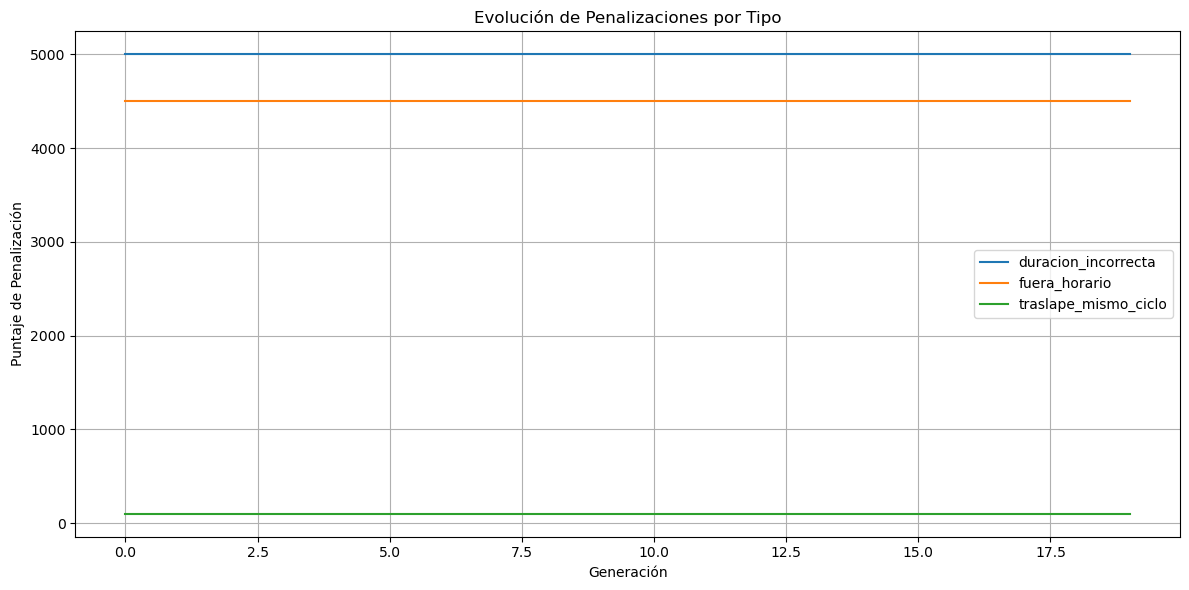

In [582]:
graficar_penalizaciones(penalizaciones_por_generacion)

In [583]:
mejor_refinada = busqueda_tabu(mejor_solucion)
print("\nMejor solución refinada con búsqueda tabú (primeras 5 sesiones):")
print(mejor_refinada[:5])


[Tabú] Iteración 1 - Mejor fitness: (9600.0, {'fuera_horario': 4500.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 5000.0})
[Tabú] Iteración 2 - Mejor fitness: (9600.0, {'fuera_horario': 4500.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 5000.0})
[Tabú] Iteración 3 - Mejor fitness: (9600.0, {'fuera_horario': 4500.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 5000.0})
[Tabú] Iteración 4 - Mejor fitness: (9600.0, {'fuera_horario': 4500.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 5000.0})
[Tabú] Iteración 5 - Mejor fitness: (9600.0, {'fuera_horario': 4500.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 5000.0})
[Tabú] Iteración 6 - Mejor fitness: (9600.0, {'fuera_horario': 4500.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 5000.0})
[Tabú] Iteración 7 - Mejor fitness: (9600.0, {'fuera_horario': 4500.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 5000.0})
[Tabú] Iteración 8 - Mejor fitness: (9600.0, {'fuera_horario':

In [584]:
mejor_refinada

[{'CodDocente': 'Z000000',
  'CodAsignatura': '202W0301',
  'Sección': 1,
  'Dia': 'VIERNES',
  'HoraInicio': '15:00',
  'HoraFin': '20:00',
  'NomDocente': 'DOCENTE_0000',
  'NomAsignatura': 'ALGORÍTMICA I',
  'Tope': 30},
 {'CodDocente': 'Z000000',
  'CodAsignatura': '202W0301',
  'Sección': 1,
  'Dia': 'VIERNES',
  'HoraInicio': '15:00',
  'HoraFin': '20:00',
  'NomDocente': 'DOCENTE_0000',
  'NomAsignatura': 'ALGORÍTMICA I',
  'Tope': 30},
 {'CodDocente': 'Z000002',
  'CodAsignatura': '202W0302',
  'Sección': 1,
  'Dia': 'VIERNES',
  'HoraInicio': '13:00',
  'HoraFin': '18:00',
  'NomDocente': 'DOCENTE_0002',
  'NomAsignatura': 'ESTADÍSTICA',
  'Tope': 30,
  'Día': 'VIERNES'},
 {'CodDocente': 'Z000003',
  'CodAsignatura': '202W0303',
  'Sección': 1,
  'Dia': 'VIERNES',
  'HoraInicio': '17:00',
  'HoraFin': '21:00',
  'NomDocente': 'DOCENTE_0003',
  'NomAsignatura': 'FISICA ELÉCTRONICA',
  'Tope': 30},
 {'CodDocente': 'Z000004',
  'CodAsignatura': '202W0304',
  'Sección': 1,
  'Dia'

In [585]:
# ========================
# 8. EXPORTACIÓN DEL HORARIO
# ========================

def exportar_horario(individuo, nombre_archivo="horario_resultado.csv"):
    columnas = ["CodAsignatura", "NomAsignatura", "CodDocente", "NomDocente",
                "Sección", "Dia", "HoraInicio", "HoraFin", "Tope"]
    
    # Verifica que cada sesión tenga las claves necesarias
    sesiones_validas = []
    for i, sesion in enumerate(individuo):
        if not isinstance(sesion, dict):
            print(f"[Advertencia] Sesión {i} no es un diccionario:", sesion)
            continue
        faltantes = set(columnas) - set(sesion.keys())
        if faltantes:
            print(f"[Advertencia] Sesión {i} tiene campos faltantes: {faltantes}")
            continue
        sesiones_validas.append(sesion)

    # Crear DataFrame y exportar
    df_final = pd.DataFrame(sesiones_validas, columns=columnas)

    print("\nVista previa del horario final exportado:")
    print(df_final.head())

    df_final.to_csv(nombre_archivo, index=False, sep=";", encoding="utf-8")
    print(f"\n✅ Horario exportado correctamente como {nombre_archivo}")
    return df_final


In [586]:
# 8. EXPORTACIÓN
df_exportado = exportar_horario(mejor_refinada)


Vista previa del horario final exportado:
  CodAsignatura         NomAsignatura CodDocente    NomDocente  Sección  \
0      202W0301         ALGORÍTMICA I    Z000000  DOCENTE_0000        1   
1      202W0301         ALGORÍTMICA I    Z000000  DOCENTE_0000        1   
2      202W0302           ESTADÍSTICA    Z000002  DOCENTE_0002        1   
3      202W0303    FISICA ELÉCTRONICA    Z000003  DOCENTE_0003        1   
4      202W0304  INGENIERÍA ECONÓMICA    Z000004  DOCENTE_0004        1   

       Dia HoraInicio HoraFin  Tope  
0  VIERNES      15:00   20:00    30  
1  VIERNES      15:00   20:00    30  
2  VIERNES      13:00   18:00    30  
3  VIERNES      17:00   21:00    30  
4   JUEVES      16:00   20:00    30  

✅ Horario exportado correctamente como horario_resultado.csv
